In [58]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf

In [59]:
obs = 10000
xs = np.random.uniform(-100,100,(obs,1))
zs = np.random.uniform(-100,100,(obs,1))
input = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1,(obs,1))
target = 3*xs + 2*zs +7+ noise
np.savez('data',inputs=input,targets=target)

In [60]:
train_data = np.load('data.npz')

In [61]:
input_size = 2
output_size = 1
model = tf.keras.Sequential([tf.keras.layers.Dense(1, kernel_initializer = tf.random_normal_initializer(-.1,.1),bias_initializer = tf.random_normal_initializer(-.1,.1))])
opti = tf.keras.optimizers.Adam(learning_rate=.001)
model.compile(optimizer=opti,loss='huber_loss')

In [62]:
model.fit(train_data['inputs'],train_data['targets'],epochs=100)

Epoch 1/100
313/313 [==============================] - 0s 549us/step - loss: 167.0739
Epoch 2/100
313/313 [==============================] - 0s 548us/step - loss: 147.7316
Epoch 3/100
313/313 [==============================] - 0s 541us/step - loss: 128.6030
Epoch 4/100
313/313 [==============================] - 0s 581us/step - loss: 109.7039
Epoch 5/100
313/313 [==============================] - 0s 584us/step - loss: 91.0638
Epoch 6/100
313/313 [==============================] - 0s 513us/step - loss: 72.7924
Epoch 7/100
313/313 [==============================] - 0s 527us/step - loss: 54.9186
Epoch 8/100
313/313 [==============================] - 0s 531us/step - loss: 37.5451
Epoch 9/100
313/313 [==============================] - 0s 563us/step - loss: 21.0719
Epoch 10/100
313/313 [==============================] - 0s 543us/step - loss: 7.7111
Epoch 11/100
313/313 [==============================] - 0s 545us/step - loss: 4.7959
Epoch 12/100
313/313 [==============================] - 0s 54

In [63]:
weights = model.layers[0].get_weights()[0]

In [64]:
bias = model.layers[0].get_weights()[1]

In [65]:
print(weights,bias)

[[3.0013356]
 [2.0003247]] [7.00323]


In [66]:
pred = model.predict_on_batch(train_data['inputs']).round(1)
pred

array([[ 113.8],
       [ 243.9],
       [-251.4],
       ...,
       [ -34.1],
       [-149. ],
       [ -76.7]], dtype=float32)

In [67]:
tar = train_data['targets'].round(1)
tar

array([[ 113.4],
       [ 244.7],
       [-252. ],
       ...,
       [ -33.1],
       [-148.5],
       [ -77.2]])

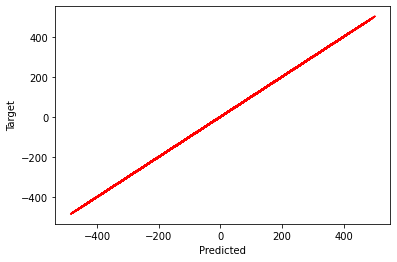

In [68]:
plt.plot(pred,tar,'',color="red")
plt.xlabel('Predicted')
plt.ylabel('Target')
#plt.legend('topright')
plt.show()